# Analysis of "Bay Wheels" Bike Share System Data between 2017 to 2020

In [1]:
# importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import seaborn as sns
import zipfile
import io
import glob
import geopy.distance
from pyproj import Geod
import datetime
%matplotlib inline

## Step 1: Data Gathering

Because the data files are distributed across multiple urls, I will download them programmatically into a single folder first

In [2]:
# Make directory if it doesn't already exist
folder_name = 'bike_share_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
# urls containing the datasets for each month
data_urls = [
    'https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip']

In [4]:
# programmatically downloading and extracting the zip files from urls
for url in data_urls:
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('/Users/tonyzhang/Desktop/coding practice/Data Analyst/4_Data Visualization/bike_share_data')

In [5]:
#open all the .csv files downloaded and concatenating into a single dataframe

path = r'/Users/tonyzhang/Desktop/coding practice/Data Analyst/4_Data Visualization/bike_share_data'                    
all_files = glob.glob(os.path.join(path, "*.csv"))  
df_from_each_file = (pd.read_csv(f) for f in all_files)
bike_df = pd.concat(df_from_each_file, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  


## Step 2: Data Analysis

Let's first quickly analyze the dataset

In [6]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,NaN
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,NaN
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,NaN
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,NaN
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,NaN


In [7]:
bike_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             5795411 non-null  int64  
 1   start_time               5795411 non-null  object 
 2   end_time                 5795411 non-null  object 
 3   start_station_id         5216604 non-null  float64
 4   start_station_name       5218438 non-null  object 
 5   start_station_latitude   5795411 non-null  float64
 6   start_station_longitude  5795411 non-null  float64
 7   end_station_id           5214956 non-null  float64
 8   end_station_name         5216782 non-null  object 
 9   end_station_latitude     5795411 non-null  float64
 10  end_station_longitude    5795411 non-null  float64
 11  bike_id                  5795411 non-null  int64  
 12  user_type                5795411 non-null  object 
 13  bike_share_for_all_trip  4127445 non-null 

**Observation**: Right off the bat I see wrong datatypes for some of the columns:

1. `start_time` and `end_time` should be `datetime`
2. `start_station_id`, `end_station_id` and `bike_id` should be `str`
3. `bike_share_for_all_trip` should be `True` or `False`
4. quite a few columns contain missing values

In [8]:
sum(bike_df.duplicated())

7512

In [9]:
duplicated_rows = bike_df[bike_df.duplicated()]
duplicated_rows.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
5031051,184,2020-03-01 15:59:07,2020-03-01 16:02:12,NaN,NaN,37.291022,-121.849144,NaN,NaN,37.294455,-121.852412,967152,Customer,NaN,clipper
5031056,167,2020-03-01 21:03:10,2020-03-01 21:05:58,NaN,NaN,37.291145,-121.849215,NaN,NaN,37.294452,-121.852453,967152,Customer,NaN,clipper
5031079,515,2020-03-01 16:18:04,2020-03-01 16:26:40,NaN,NaN,37.293233,-121.881765,NaN,NaN,37.305733,-121.898976,809335,Customer,NaN,app
5031090,222,2020-03-01 12:51:13,2020-03-01 12:54:56,NaN,NaN,37.293674,-121.851900,NaN,NaN,37.291026,-121.849131,967152,Customer,NaN,clipper
5031124,197,2020-03-01 16:46:45,2020-03-01 16:50:03,NaN,NaN,37.294480,-121.852444,NaN,NaN,37.291145,-121.849184,967152,Customer,NaN,clipper


**observation:** 7512 duplicated rows

In [10]:
bike_df.start_station_name.value_counts()

Market St at 10th St                                         99612
San Francisco Ferry Building (Harry Bridges Plaza)           97387
San Francisco Caltrain (Townsend St at 4th St)               95304
Berry St at 4th St                                           94194
San Francisco Caltrain Station 2  (Townsend St at 4th St)    86248
                                                             ...  
Howard workshop - Station in a Box                               5
San Jose Depot                                                   4
Prototype Lab                                                    4
Philly Demo                                                      2
SF Test Station                                                  1
Name: start_station_name, Length: 507, dtype: int64

In [11]:
len(bike_df.start_station_name.value_counts().index)

507

In [12]:
bike_df.end_station_name.value_counts()

San Francisco Caltrain (Townsend St at 4th St)               124871
San Francisco Ferry Building (Harry Bridges Plaza)           116065
San Francisco Caltrain Station 2  (Townsend St at 4th St)    115804
Montgomery St BART Station (Market St at 2nd St)             105153
Market St at 10th St                                          97755
                                                              ...  
Howard workshop - Station in a Box                                4
Prototype Lab                                                     4
San Jose Depot                                                    2
Philly Demo                                                       2
Emeryville Depot                                                  1
Name: end_station_name, Length: 507, dtype: int64

In [13]:
len(bike_df.end_station_name.value_counts().index)

507

**Observation:** 
1. The number of start and end stations match, which makes sense as there are likely 507 stations regardless of where you start
2. `start_station_longitude`, `end_station_id`, `end_station_latitude`, `end_station_longitude` are likely not useful for our analysis when we can just use their names

In [14]:
bike_df.user_type.value_counts()

Subscriber    4558646
Customer      1236765
Name: user_type, dtype: int64

In [15]:
bike_df.rental_access_method.value_counts()

app        678481
clipper     60215
Name: rental_access_method, dtype: int64

In [16]:
# some statistics regarding trip durations
bike_df.duration_sec.describe()

count    5.795411e+06
mean     8.496090e+02
std      2.233872e+03
min      6.000000e+01
25%      3.600000e+02
50%      5.720000e+02
75%      8.930000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

In [17]:
# numbers of share bikes available
len(set(bike_df.bike_id))

15996

### Summary:

Tidiness Issues:

None

Quality Issues:


1. `bike_share_for_all_trip` should be `True` or `False`
2. quite a few columns contain missing values
3. drop duplicate rows
4. dropping unecessary columns
5. `start_time` and `end_time` should be `datetime`
6. `start_station_id`, `end_station_id` and `bike_id` should be `str`

## Step 3: Data Cleaning

In [18]:
# make a copy of the original dataset first

bike_clean = bike_df.copy()

In [19]:
# setting the coordinates to 3 decimal place to be used later
columns = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
bike_clean[columns] = bike_clean[columns].round(3)

In [20]:
# replace all 'nan' strings with None
bike_clean = bike_clean.replace('nan', None)

**Quality Issue 1:**

**Define:** `bike_share_for_all_trip` should be a boolean of `True` or `False` instead of `Yes` or `No`

**Code:**

In [21]:
bike_clean.bike_share_for_all_trip = bike_clean.bike_share_for_all_trip.replace(['Yes', 'No'], ['True', 'False'])

**Test**:

In [22]:
bike_clean.bike_share_for_all_trip.value_counts()

False    3787538
True      339907
Name: bike_share_for_all_trip, dtype: int64

**Quality Issue 2:**

**Define:** Let's start with the missing values for `start_station_name` and `end_station_name`. I will create a dictionary using the lat/long values (since these are not missing) to fill in the start and end station names, next, I will create a second dictionary of station ID to station names to fill in the missing station ID values.

**Code:**

In [23]:
#make a dataframe with only the unique values of station names
uniques = bike_clean[['start_station_id','start_station_name', 'start_station_latitude', 'start_station_longitude']].drop_duplicates(subset=['start_station_name']).dropna()

In [24]:
# create a new column for coordinates by joining lat and long columns in the unique df
uniques['lat_long'] = [', '.join(str(x) for x in y) for y in map(tuple, uniques[['start_station_latitude', 'start_station_longitude']].values)]

In [25]:
# creating a dictionary of lat_lons and station_name
station_names = pd.Series(uniques.start_station_name.values,index=uniques.lat_long).to_dict()

In [26]:
# creating a dictionary of station id and station name
station_id = pd.Series(uniques.start_station_id.values,index=uniques.start_station_name).to_dict()

In [27]:
# create the same coordinates column in our original dataset
bike_clean['lat_long'] = [', '.join(str(x) for x in y) for y in map(tuple, bike_clean[['start_station_latitude', 'start_station_longitude']].values)]

In [28]:
# filling in missing values for station name with our dictionary

bike_clean['start_station_name'] = bike_clean['start_station_name'].fillna(bike_clean['lat_long'].apply(lambda x: station_id.get(x)))
bike_clean['end_station_name'] = bike_clean['end_station_name'].fillna(bike_clean['lat_long'].apply(lambda x: station_id.get(x)))
bike_clean['start_station_id'] = bike_clean['start_station_id'].fillna(bike_clean['start_station_name'].apply(lambda x: station_id.get(x)))
bike_clean['end_station_id'] = bike_clean['end_station_id'].fillna(bike_clean['end_station_name'].apply(lambda x: station_id.get(x)))

**Test:**

In [29]:
bike_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             5795411 non-null  int64  
 1   start_time               5795411 non-null  object 
 2   end_time                 5795411 non-null  object 
 3   start_station_id         5218260 non-null  float64
 4   start_station_name       5218438 non-null  object 
 5   start_station_latitude   5795411 non-null  float64
 6   start_station_longitude  5795411 non-null  float64
 7   end_station_id           5216580 non-null  float64
 8   end_station_name         5216782 non-null  object 
 9   end_station_latitude     5795411 non-null  float64
 10  end_station_longitude    5795411 non-null  float64
 11  bike_id                  5795411 non-null  int64  
 12  user_type                5795411 non-null  object 
 13  bike_share_for_all_trip  4127445 non-null 

**Note:** Unfortunately I was unable to fill in every single missing data for each start/end station name and id using my method, what I managed to recover was:

- `start_station_id`: 5218260 - 5216604 = 1656
- `end_station_id`: 5216580 - 5214956 = 1624
- `start_station_name`: 5218438 - 5218438 = 0
- `end_station_name`: 5216782 - 5216782 = 0

My suspicions as to why the method did not work for all values was due to the fact that some of the coordinates were just not mapped to any stations to begin with, which would of course not be part of the dataset. One of the biggest challenges was also picking an appropriate rounding point for each lat/lon value, as some locations were identical in name, but had differing lat/long values up to the 3rd or 4th decimal points.

One other strategy that would potentially work is to perform reverse geocoding on each coordinate to get its location using the geopy library, however, with over 5million+ data points, the standard built in API would not be feasible. 

Therefore, although unfortunate, I think maybe the best solution would be to drop all of the missing values with reference to `start_station_id` (this column contains the most missing values), as we will be using the station names as part of our analysis. 

In [37]:
# dropping all missing values in reference to start_station_id
bike_clean = bike_clean[bike_clean['start_station_id'].notna()]

In [31]:
bike_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5216580 entries, 0 to 5795410
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             5216580 non-null  int64  
 1   start_time               5216580 non-null  object 
 2   end_time                 5216580 non-null  object 
 3   start_station_id         5126125 non-null  float64
 4   start_station_name       5126199 non-null  object 
 5   start_station_latitude   5216580 non-null  float64
 6   start_station_longitude  5216580 non-null  float64
 7   end_station_id           5216580 non-null  float64
 8   end_station_name         5216580 non-null  object 
 9   end_station_latitude     5216580 non-null  float64
 10  end_station_longitude    5216580 non-null  float64
 11  bike_id                  5216580 non-null  int64  
 12  user_type                5216580 non-null  object 
 13  bike_share_for_all_trip  4114929 non-null 

**Observation:** Alright, most of the missing values have been removed, in total we removed approximately 12% of the original data due to unrecoverable missing values. We are also missing data for `bike_share_for_all_trip` and `rental_access_method`, however these data are not recoverable and removing these missing values will be too "expensive" as it will largely diminish the size of our current df. Therefore, we'll just leave it.

**Quality Issue 3:**

**Define:** dropping all the duplicated rows

**Code:**

In [32]:
sum(bike_clean.duplicated())

1178

In [33]:
bike_clean = bike_clean.drop_duplicates()

**Test:**

In [34]:
sum(bike_clean.duplicated())

0

**Quality Issue 4, 5 and 6:**

**Define:** First we will drop columns which will not contribute to our analysis, then we will change the datatypes of each column to the appropriate type

**Code:**

In [35]:
bike_clean = bike_clean.drop(['lat_long'], axis=1)

In [38]:
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)
bike_clean.start_station_id = bike_clean.start_station_id.astype('int').astype('str')
bike_clean.end_station_id = bike_clean.end_station_id.astype('int').astype('str')
bike_clean.bike_id = bike_clean.bike_id.astype('int').astype('str')

**Test:**

In [39]:
bike_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125741 entries, 0 to 5795410
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             5125741 non-null  int64         
 1   start_time               5125741 non-null  datetime64[ns]
 2   end_time                 5125741 non-null  datetime64[ns]
 3   start_station_id         5125741 non-null  object        
 4   start_station_name       5125741 non-null  object        
 5   start_station_latitude   5125741 non-null  float64       
 6   start_station_longitude  5125741 non-null  float64       
 7   end_station_id           5125741 non-null  object        
 8   end_station_name         5125741 non-null  object        
 9   end_station_latitude     5125741 non-null  float64       
 10  end_station_longitude    5125741 non-null  float64       
 11  bike_id                  5125741 non-null  object        
 12  

In [40]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.785,-122.401,114,Rhode Island St at 17th St,37.764,-122.403,1035,Subscriber,False,NaN
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.805,-122.403,324,Union Square (Powell St at Post St),37.788,-122.409,1673,Customer,False,NaN
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93,4th St at Mission Bay Blvd S,37.770,-122.391,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795,-122.394,3498,Customer,False,NaN
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93,4th St at Mission Bay Blvd S,37.770,-122.391,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795,-122.394,3129,Customer,False,NaN
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.337,-121.894,297,Locust St at Grant St,37.323,-121.888,1839,Subscriber,True,NaN


## Step 4: Exploratory Data Analysis

### 1. Univariate Analysis:

After having time to think and play with the data, I feel like most of the interesting analysis for this dataset may be univariate in nature, as from the perspective of the company, they may be interested in learning more about "counts" than relationships. I will spend most of the time in this section.

1. What's the distribution of trip duration?
2. whats the distribution of distance per trip?
3. what's the distribution for the amount of trips per bike?
4. what are the most popular stations?
5. what's the most popular trip? (in terms of start and stop locations)
6. what are the busiest time of day and day of the week for share bikes?
7. what are the difference in the number of each user type

#### Question 1. What's the distribution of trip duration?

In [41]:
bike_clean.duration_sec.describe()

count    5.125741e+06
mean     8.538010e+02
std      2.273540e+03
min      6.000000e+01
25%      3.580000e+02
50%      5.670000e+02
75%      8.850000e+02
max      8.636900e+04
Name: duration_sec, dtype: float64

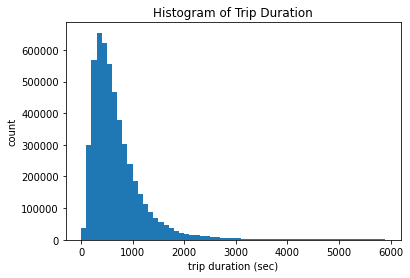

In [42]:
bin_edges = np.arange(0, 6000, 100)
plt.hist(data=bike_clean, x='duration_sec', bins=bin_edges);
plt.title('Histogram of Trip Duration');
plt.ylabel('count')
plt.xlabel('trip duration (sec)');

**Observation**: the histogram of trip duration is heavily right skewed and reflects its descriptive statistics, with a single peak (mean) at around 885 seconds

#### Question 2: whats the distribution of distance per trip?

In [43]:
# to answer this question, we'll first need to obtain the distance per trip based on the given start/stop coordinates

#Distance will be measured on this ellipsoid - more accurate than a spherical method
wgs84_geod = Geod(ellps='WGS84')

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
  return dist

In [44]:
#Add/update a column to the data frame with the distances (in metres)
bike_clean['trip_dist'] = Distance(bike_clean['start_station_latitude'].tolist(),
                           bike_clean['start_station_longitude'].tolist(),
                           bike_clean['end_station_latitude'].tolist(),
                           bike_clean['end_station_longitude'].tolist())

In [45]:
bike_clean.trip_dist.describe()

count    5.125741e+06
mean     1.895030e+03
std      5.627376e+04
min      0.000000e+00
25%      9.052467e+02
50%      1.432757e+03
75%      2.157373e+03
max      1.280988e+07
Name: trip_dist, dtype: float64

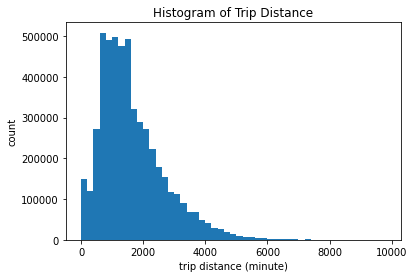

In [46]:
bin_edges = np.arange(0, 10000, 200)
plt.hist(data=bike_clean, x='trip_dist', bins=bin_edges);
plt.title('Histogram of Trip Distance');
plt.ylabel('count')
plt.xlabel('trip distance (minute)');

**Observation:** Similar to trip duration, the distribution of trip distance is right skewed

#### Question 3: what's the distribution for the amount of trips per bike?

In [47]:
bike_clean.bike_id.value_counts().describe()

count    15098.000000
mean       339.498013
std        434.345014
min          1.000000
25%         21.000000
50%        157.000000
75%        464.000000
max       2055.000000
Name: bike_id, dtype: float64

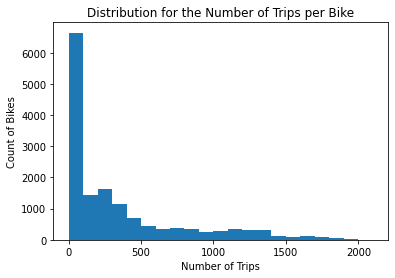

In [48]:
#bike_clean.bike_id.value_counts().hist();
bin_edges = np.arange(0, bike_clean.bike_id.value_counts().max()+100, 100)
plt.hist(bike_clean.bike_id.value_counts(), bins=bin_edges);
plt.title('Distribution for the Number of Trips per Bike')
plt.ylabel('Count of Bikes')
plt.xlabel('Number of Trips');

**Observation:** The distribution of bike usage is also right skewed, with over 6000 sharebikes having only around 100 trips, while the average number of trips per bike is 434. This tells us that there are a lot of new bikes in the rotation.

#### Question 4: what are the most popular stations?

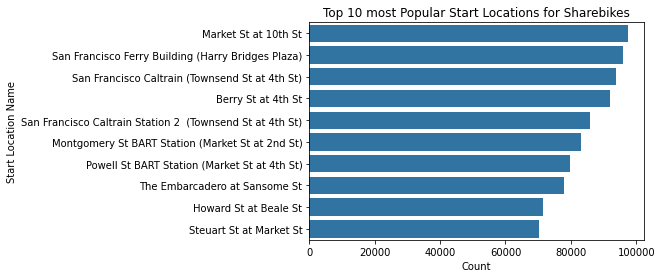

In [49]:
# plotting the 10 most popular start stations by count
order = bike_clean['start_station_name'].value_counts()[0:10].sort_values(ascending=False).index
bike_start = bike_clean[bike_clean['start_station_name'].isin(order)]
base_color = sns.color_palette()[0]
sns.countplot(data=bike_start, y='start_station_name', color=base_color, order = order);
plt.title('Top 10 most Popular Start Locations for Sharebikes')
plt.ylabel('Start Location Name')
plt.xlabel('Count');

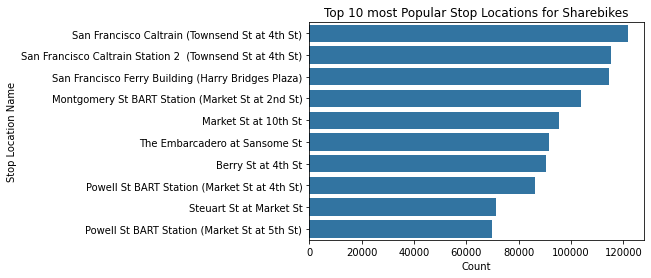

In [50]:
# plotting the 10 most popular end stations by count
order = bike_clean['end_station_name'].value_counts()[0:10].sort_values(ascending=False).index
bike_start = bike_clean[bike_clean['end_station_name'].isin(order)]
base_color = sns.color_palette()[0]
sns.countplot(data=bike_start, y='end_station_name', color=base_color, order = order);
plt.title('Top 10 most Popular Stop Locations for Sharebikes')
plt.ylabel('Stop Location Name')
plt.xlabel('Count');

**Analysis:** The top 10 most popular start stations and end stations are 90% alike, which could represent areas of high population density/popular city spots. This information may be most useful when deciding where to allocate more share bikes. In particular we can deduce some interesting observations from comparing the two charts such as more people use the sharebikes to go to the San Francisco Caltrain station than using it to leave.

#### Questions 5: what's the most popular trip? (in terms of start and stop locations)

In [51]:
# we first need to make a new column of concatenated start and end stations

bike_clean['trip'] = bike_clean['start_station_name'] + ', ' + bike_clean['end_station_name']

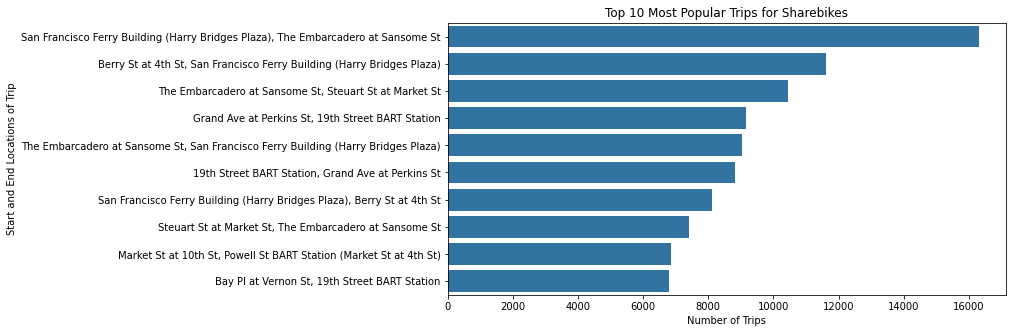

In [52]:
plt.figure(figsize=[10,5])
order = bike_clean['trip'].value_counts()[0:10].sort_values(ascending=False).index
bike_start = bike_clean[bike_clean['trip'].isin(order)]
base_color = sns.color_palette()[0]
sns.countplot(data=bike_start, y='trip', color=base_color, order = order);
plt.title('Top 10 Most Popular Trips for Sharebikes')
plt.ylabel('Start and End Locations of Trip')
plt.xlabel('Number of Trips');

**Analysis:** the trip between the San Francisco Ferry Building and the Embarcadero at Sansome St. is by far the most popular trip

#### Question 6.  what are the busiest time of day and day of the week for share bikes?

In [53]:
# extract the time value from our start_time

bike_clean['start_hour'] = bike_clean['start_time'].dt.hour


In [54]:
bike_clean.start_hour.value_counts()[0:2]

17    607203
8     576125
Name: start_hour, dtype: int64

In [55]:
# extracting day of week from start_time
dow = {0: 'Monday',
       1: 'Tuesday',
       2: 'Wednesday',
       3: 'Thursday',
       4: 'Friday',
       5: 'Saturday',
       6: 'Sunday'}

bike_clean['day_of_week'] = bike_clean['start_time'].dt.dayofweek
bike_clean = bike_clean.replace({'day_of_week':dow})

In [56]:
bike_clean.day_of_week.value_counts()

Tuesday      873515
Thursday     866999
Wednesday    863778
Monday       809376
Friday       808856
Saturday     477370
Sunday       425847
Name: day_of_week, dtype: int64

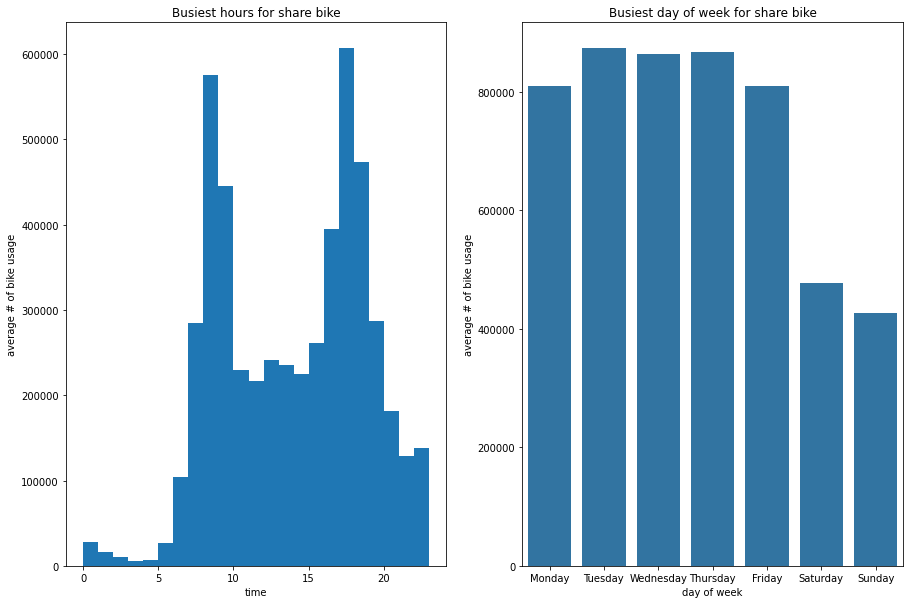

In [57]:
plt.figure(figsize=[15,10])

#left plot is hours of day
plt.subplot(1,2,1)
bin_edges = np.arange(0, 24, 1)
plt.hist(data=bike_clean, x='start_hour', bins=bin_edges);
plt.title('Busiest hours for share bike');
plt.ylabel('average # of bike usage')
plt.xlabel('time');

#right plot is day of week
plt.subplot(1,2,2)
sns.countplot(data=bike_clean, x='day_of_week', color=base_color, order = ['Monday','Tuesday','Wednesday','Thursday',
                                                                          'Friday', 'Saturday', 'Sunday'])
plt.title('Busiest day of week for share bike');
plt.ylabel('average # of bike usage')
plt.xlabel('day of week');

**Observation:** from the distribution of time of day, we see that the two peaks correspond to 8 am and 5 pm, which represents morning and afternoon rush hours.For day of week, there are a lot more users on weekdays than weekends, which may suggest that people use it mostly for work related commutes

#### Question 7: what are the differences between the number of user types?

In [58]:
# build a smaller df composed of values of user_type
user_type = bike_clean[bike_clean.user_type.notna()]

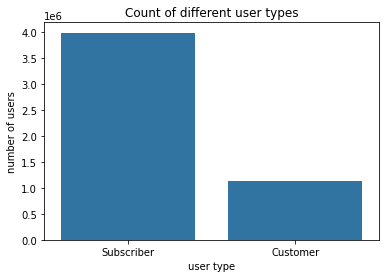

In [59]:
sns.countplot(data=user_type, x='user_type', color=base_color)
plt.title('Count of different user types');
plt.ylabel('number of users')
plt.xlabel('user type');

**Observation:** there are a lot more subscribers than there are customers

### 2. Bivariate Analysis:

1. what is the relationship between trip duration and trip length?
2. what's the distance of the 10 most popular trips?
3. what's the relationship between day of the week and trip length/trip duration

#### Question 1: what is the relationship between trip duration and trip length?

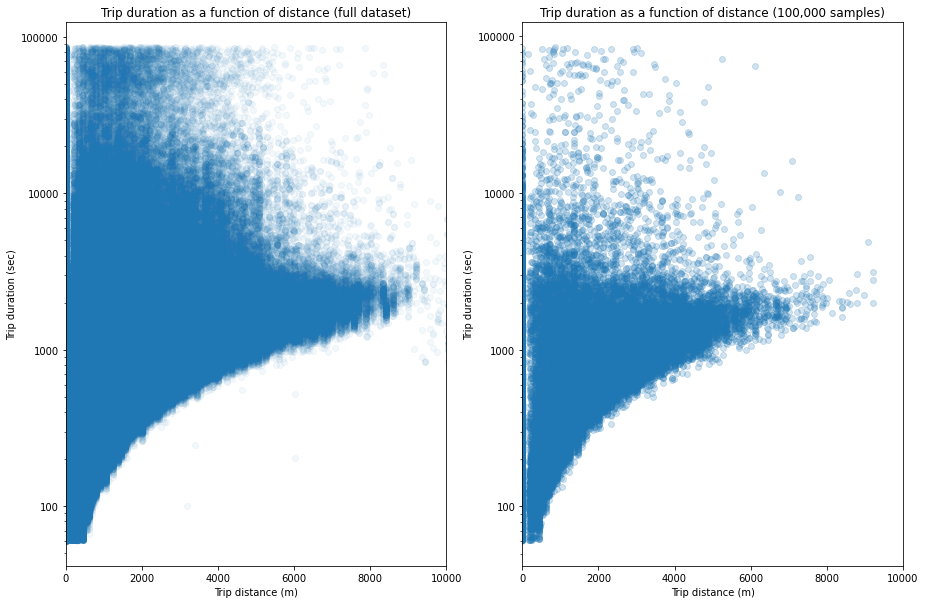

In [60]:
plt.figure(figsize=[15,10])

#no sampling
plt.subplot(1,2,1)
ax = sns.regplot(data=bike_clean, x = 'trip_dist', y = 'duration_sec', fit_reg=False, 
                 x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha':0.05});
plt.yscale('log')
tick_locs = [100, 1000, 10000, 100000]
plt.yticks(tick_locs, tick_locs)
ax.set_xlim(0,10000);
plt.title('Trip duration as a function of distance (full dataset)')
plt.xlabel('Trip distance (m)')
plt.ylabel('Trip duration (sec)');

#sampling used
plt.subplot(1,2,2)
sample_df = bike_clean.sample(100000)
ax = sns.regplot(data=sample_df, x = 'trip_dist', y = 'duration_sec', fit_reg=False, 
                 x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha':0.2});
plt.yscale('log')
tick_locs = [100, 1000, 10000, 100000]
plt.yticks(tick_locs, tick_locs)
ax.set_xlim(0,10000);
plt.title('Trip duration as a function of distance (100,000 samples)')
plt.xlabel('Trip distance (m)')
plt.ylabel('Trip duration (sec)');

**Analysis**: despite all the noise, we can observe from this plot that there is a positive relationship between the distance and duration of a trip. I've set the trip distance to a maximum of 10km as there were many outlier outside of this range and extreme distances. Also notice the vertical line at a trip distance of 0, which may indicate that a bike was activated but not used, or used for minutely small distances.

#### Question 2: what's the distance of the 10 most popular trips?

In [61]:
# construct a smaller df including only the top 10 trip
toptrip = bike_clean['trip'].value_counts()[0:10].sort_values(ascending=False).index
toptrip_df = bike_clean.loc[bike_clean['trip'].isin(toptrip)]

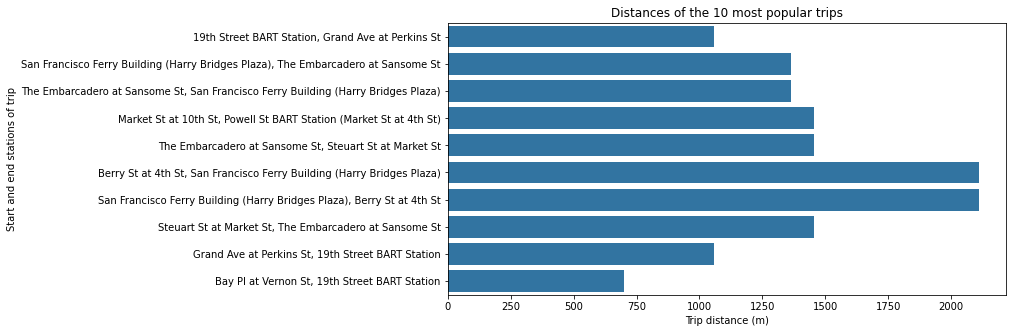

In [62]:
# for our investigation of x=cat_var and y=num_var, a barplot may be best
plt.figure(figsize=[10,5])
sns.barplot(data=toptrip_df, y = 'trip', x='trip_dist', color=base_color);
plt.title('Distances of the 10 most popular trips')
plt.xlabel('Trip distance (m)')
plt.ylabel('Start and end stations of trip');

**Observations:** of the 10 most popular trips, the maximum commute length is just over 2000 meters

#### Question 3: what's the relationship between day of the week and trip length/trip duration

In [63]:
DOF_time = pd.DataFrame(bike_clean.groupby('day_of_week')['duration_sec'].mean())
DOF_dist = pd.DataFrame(bike_clean.groupby('day_of_week')['trip_dist'].mean())

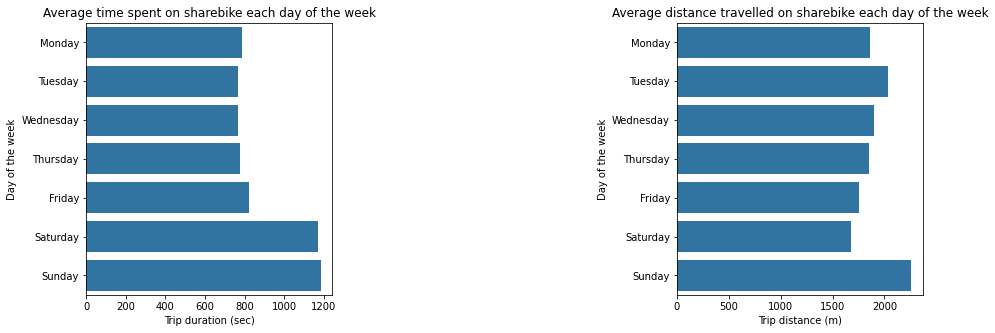

In [64]:
plt.figure(figsize=[15,5])


#left plot is DOF and trip length
plt.subplot(1,3,1)
sns.barplot(data=DOF_time, x = 'duration_sec', y=DOF_time.index, color=base_color, order = ['Monday','Tuesday','Wednesday','Thursday',
                                                                          'Friday', 'Saturday', 'Sunday']);
plt.title('Average time spent on sharebike each day of the week')
plt.xlabel('Trip duration (sec)')
plt.ylabel('Day of the week');

#left plot is DOF and trip duration
plt.subplot(1,3,3)
sns.barplot(data=DOF_dist, x = 'trip_dist', y=DOF_dist.index, color=base_color, order = ['Monday','Tuesday','Wednesday','Thursday',
                                                                          'Friday', 'Saturday', 'Sunday']);
plt.title('Average distance travelled on sharebike each day of the week')
plt.xlabel('Trip distance (m)')
plt.ylabel('Day of the week');

**Analysis:** It seems that people on average spend more time on sharebikes during weekends than weekdays, even though there are more usage during weekdays. For the distance, the order seems unintuitive. Tuesdays have the highest distanced travelled after Sunday, which seems kind of weird

### 3. Multivariate Analysis:

1. what is the difference between user_type in the average time spent of the bike each day of the week?
2. what is the difference between user_type in the average trip distance of the bike each day of the week?

#### Question 1: what is the difference between user_type in the average time spent of the bike each day of the week?

In [65]:
# getting the average values each day of week per user type
user_DOF_time = pd.DataFrame(user_type.groupby(['day_of_week', 'user_type'])['duration_sec'].mean()).reset_index()
user_DOF_time

,day_of_week,user_type,duration_sec
0,Friday,Customer,1377.296439
1,Friday,Subscriber,665.819866
2,Monday,Customer,1356.897754
3,Monday,Subscriber,655.603841
4,Saturday,Customer,1907.823224
5,Saturday,Subscriber,759.562163
6,Sunday,Customer,1964.811621
7,Sunday,Subscriber,760.706611
8,Thursday,Customer,1295.735600
9,Thursday,Subscriber,657.264264


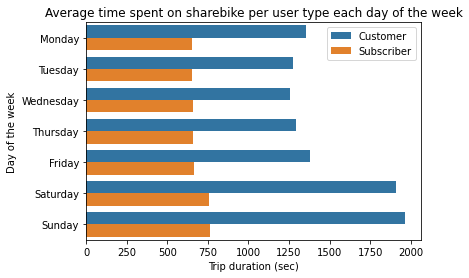

In [66]:
sns.barplot(data=user_DOF_time, x = 'duration_sec', y='day_of_week', hue='user_type', order = ['Monday','Tuesday','Wednesday','Thursday',
                                                                          'Friday', 'Saturday', 'Sunday']);
plt.title('Average time spent on sharebike per user type each day of the week')
plt.xlabel('Trip duration (sec)')
plt.ylabel('Day of the week');
plt.legend();

**Observation**: customers (casual) spend a lot more time on the bikes over subscribers (members), both user types follow the same trip per day of week however.

#### Question 2: what is the difference between user_type in the average travel distance of the bike each day of the week?

In [67]:
# getting the average values each day of week per user type
user_DOF_dist = pd.DataFrame(user_type.groupby(['day_of_week', 'user_type'])['trip_dist'].mean()).reset_index()
user_DOF_dist

,day_of_week,user_type,trip_dist
0,Friday,Customer,1952.899411
1,Friday,Subscriber,1697.641756
2,Monday,Customer,2741.732385
3,Monday,Subscriber,1656.894080
4,Saturday,Customer,1819.992796
5,Saturday,Subscriber,1600.376999
6,Sunday,Customer,3077.088780
7,Sunday,Subscriber,1815.412846
8,Thursday,Customer,2288.068665
9,Thursday,Subscriber,1751.576797


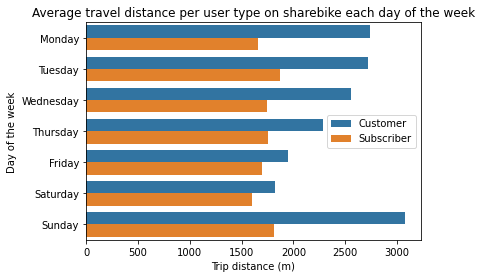

In [68]:
sns.barplot(data=user_DOF_dist, x = 'trip_dist', y='day_of_week', hue='user_type', order = ['Monday','Tuesday','Wednesday','Thursday',
                                                                          'Friday', 'Saturday', 'Sunday']);
plt.title('Average travel distance per user type on sharebike each day of the week')
plt.xlabel('Trip distance (m)')
plt.ylabel('Day of the week');
plt.legend();

**Observations:** simialr to time, customers on average have longer trips over subscribers, however the discrepancies are much smaller, especially during Friday and Saturday

### 4. Summarizng Points

1.	Over 6000 out of 16000 sharebikes have only around 100 trips, while the average number of trips per bike is 434. This tells us that there are a lot of new bikes in the rotation.
2.	The most popular (frequent) starting location for a trip is Market St. at 10th St., while the most popular end location is the San Francisco Caltrain (Townsend and 4th.)
3.	The trip between the San Francisco Ferry Building and the Embarcadero at Sansome St. is by far the most popular trip in terms of frequency
4.	8 am and 5 pm are the busiest times, which represents morning and afternoon rush hours. For day of week, there are a lot more users on weekdays than weekends, which may suggest that people use it mostly for work related commutes
5.	There are 3.69 times more subscribers than there are regular customers, however, when it comes to bikeshare usage, it seems that the casual customers use the bikes for longer time and further trips than subscribers. This may mean that a large portion of subscribers aren't taking advantage of their subscriptions.
6.	There is a positive relationship between the distance and duration of a trip.
7.	Out of the 10 most popular trips, the average maximum commute length is just over 2000 meters
8.	Users on average spend more time on sharebikes during weekends than weekdays, even though there is more usage during weekdays (see point 4). Tuesdays have the highest distanced travelled after Sunday, which seems kind of unintuitive.

## Step 5: Saving our final dataset

In [69]:
bike_clean.to_csv('BayWheels_data_clean.csv', index = False)